# Sentiment Analysis using GCP Cloud Natural Language API

**Are rating stars everything? How do you decide whether to give 4/5 stars? Look at the examples give in the below picture and you will know it's inevitable that people have different standards to give stars.**

<img src='yelp-reviews.jpg' style='width:300px'/>

**This project helps you build a more pragmatic and useful rating system based on reviews that uniforms the standards of giving stars.**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sentiment-Analysis-using-GCP-Cloud-Natural-Language-API" data-toc-modified-id="Sentiment-Analysis-using-GCP-Cloud-Natural-Language-API-1">Sentiment Analysis using GCP Cloud Natural Language API</a></span><ul class="toc-item"><li><span><a href="#Data-process" data-toc-modified-id="Data-process-1.1">Data process</a></span><ul class="toc-item"><li><span><a href="#Gather-business-ids-of-business-of-interest-(boi):-Starbucks" data-toc-modified-id="Gather-business-ids-of-business-of-interest-(boi):-Starbucks-1.1.1">Gather business ids of business of interest (boi): Starbucks</a></span></li><li><span><a href="#Read-reviews-and-preprocess" data-toc-modified-id="Read-reviews-and-preprocess-1.1.2">Read reviews and preprocess</a></span></li><li><span><a href="#Merge-and-Save-reviews" data-toc-modified-id="Merge-and-Save-reviews-1.1.3">Merge and Save reviews</a></span></li><li><span><a href="#Visualize-Avg-Star-Rating" data-toc-modified-id="Visualize-Avg-Star-Rating-1.1.4">Visualize Avg Star Rating</a></span></li></ul></li><li><span><a href="#Sentiment-analysis-using-GCP-Natural-Language-API" data-toc-modified-id="Sentiment-analysis-using-GCP-Natural-Language-API-1.2">Sentiment analysis using GCP Natural Language API</a></span><ul class="toc-item"><li><span><a href="#Installed-the-Google-Client-Library" data-toc-modified-id="Installed-the-Google-Client-Library-1.2.1">Installed the Google Client Library</a></span></li><li><span><a href="#Calculate-sentiment-score" data-toc-modified-id="Calculate-sentiment-score-1.2.2">Calculate sentiment score</a></span></li></ul></li><li><span><a href="#EDA-on-the-sentiment-scores-results" data-toc-modified-id="EDA-on-the-sentiment-scores-results-1.3">EDA on the sentiment scores results</a></span><ul class="toc-item"><li><span><a href="#Charts" data-toc-modified-id="Charts-1.3.1">Charts</a></span><ul class="toc-item"><li><span><a href="#Ratings-vs.-Sentiment-Scores" data-toc-modified-id="Ratings-vs.-Sentiment-Scores-1.3.1.1">Ratings vs. Sentiment Scores</a></span></li></ul></li><li><span><a href="#Regional-analysis" data-toc-modified-id="Regional-analysis-1.3.2">Regional analysis</a></span><ul class="toc-item"><li><span><a href="#Samples-of-diff=2-and-diff=4" data-toc-modified-id="Samples-of-diff=2-and-diff=4-1.3.2.1">Samples of diff=2 and diff=4</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Data process

In [18]:
import json
import pandas as pd
from matplotlib import pyplot as plt

### Gather business ids of business of interest (boi): Starbucks

In [19]:
# read raw json file
business_json_path = 'yelp_dataset/business.json'
business_df = pd.read_json(business_json_path, lines=True)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [20]:
# extract data of business of interest (boi) from raw file
boi_list = ['Starbucks']
boi_df = business_df.loc[business_df['name'].isin(boi_list)]
print("Totally {} businesses.".format(boi_df.shape[0]))
boi_df.head()

Totally 1066 businesses.


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
128,sKhDrZFCJqfRNylkHrIDsQ,Starbucks,"1990 Village Center Circle, Suite 1",Las Vegas,NV,89134,36.191852,-115.304983,4.0,76,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Coffee & Tea","{'Monday': '4:0-20:0', 'Tuesday': '4:0-20:0', ..."
277,NAb3h3qC-12q5sjOzvIDHg,Starbucks,425 Cox Rd,Gastonia,NC,28054,35.262558,-81.133545,2.5,13,1,"{'OutdoorSeating': 'False', 'Caters': 'False',...","Coffee & Tea, Food","{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ..."
425,Mq6qiz-Bxgd8VE6tBwCuUg,Starbucks,190 Queen Street E,Brampton,ON,L6W 2B3,43.693769,-79.752138,4.5,5,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsGo...","Restaurants, Breakfast & Brunch, Food, Coffee ...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
665,7v-2HkyrfYkPf471v4gCmg,Starbucks,7400 S. Las Vegas Blvd.,Las Vegas,NV,89123,36.053946,-115.169012,2.0,36,1,"{'BikeParking': 'True', 'WiFi': ''free'', 'Res...","Food, Coffee & Tea","{'Monday': '7:30-21:0', 'Tuesday': '7:30-21:0'..."
796,qOuyItOatd-TF5kzhUlA9g,Starbucks,4815 E. Carfree highway,Cave Creek,AZ,85331,33.797410,-111.976914,4.5,11,1,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...","Restaurants, Food, Coffee & Tea","{'Monday': '5:0-20:0', 'Tuesday': '5:0-20:0', ..."


In [21]:
# get a map-list of the businesses of interest and their first five business ids.
bid_map = {}

for boi in boi_list:
    bid_map[boi] = boi_df.loc[boi_df['name'] == boi]['business_id'].tolist()
    print("{}: {}".format(boi, bid_map[boi][:5]))

Starbucks: ['sKhDrZFCJqfRNylkHrIDsQ', 'NAb3h3qC-12q5sjOzvIDHg', 'Mq6qiz-Bxgd8VE6tBwCuUg', '7v-2HkyrfYkPf471v4gCmg', 'qOuyItOatd-TF5kzhUlA9g']


In [23]:
# extract a dataframe with the locations of businesses of interest
boi_location = boi_df[['business_id', 'name', 'city', 'state']]
boi_location.head(5)

,business_id,name,city,state
128,sKhDrZFCJqfRNylkHrIDsQ,Starbucks,Las Vegas,NV
277,NAb3h3qC-12q5sjOzvIDHg,Starbucks,Gastonia,NC
425,Mq6qiz-Bxgd8VE6tBwCuUg,Starbucks,Brampton,ON
665,7v-2HkyrfYkPf471v4gCmg,Starbucks,Las Vegas,NV
796,qOuyItOatd-TF5kzhUlA9g,Starbucks,Cave Creek,AZ


### Read reviews and preprocess

In [35]:
# read raw review json file
review_json_path = 'yelp_dataset/review.json'
review_df = pd.read_json(review_json_path, lines=True)
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [36]:
# drop useless columns
drop_columns = ['review_id','user_id']
review_df = review_df.drop(drop_columns, axis=1)
review_df.head()

,business_id,stars,useful,funny,cool,text,date
0,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [37]:
# get the reviews of business of interest through mapping business ids
# put different businesses of interes's df of reviews into a list
boi_review_df_list = []
for boi in boi_list:
    boi_review_df_list.append(review_df.loc[review_df['business_id'].isin(bid_map[boi])])
for i, boi_name in enumerate(boi_list):
    print("\n\n{}: totally {} reviews.".format(boi_name, boi_review_df_list[i].shape[0]))
    print(boi_review_df_list[i].head())



Starbucks: totally 24846 reviews.
                business_id  stars  useful  funny  cool  \
286  4QAgHOm7BE5yZupy0j-NJQ      1       0      0     0   
572  vYu1_HnKIcj6_rhw3p4qYw      1       1      1     0   
584  JxKWfZ6hG8iRnK8QL65jTw      1       0      0     0   
603  t6SfYTEvg0o_cfJddsqEcg      5       0      0     0   
631  5jak2hYO5ikUzjm-Ytao5A      2       1      0     0   

                                                  text                date  
286  Worst service ever.  Only one here and took 10... 2017-07-18 17:31:43  
572  Worst Starbucks EVER!!!! The wait time is alwa... 2015-10-17 00:43:00  
584  Very rude staff. Slow little to no communicati... 2017-07-28 17:44:36  
603  I was very pleased with my visit yesterday the... 2017-12-29 15:41:18  
631  Always slow service. They don't always have wh... 2015-04-28 19:28:49  


### Merge and Save reviews

In [38]:
# convert the list of businesses of interest into a list of dataframe
boi_name_df_list = [ pd.DataFrame(data={
  'business_name': [boi_name]
}) for boi_name in boi_list ]
boi_name_df_list

[  business_name
 0     Starbucks]

In [39]:
# assign business_name new column to the dataframe
for i, df in enumerate(boi_review_df_list):
    boi_review_df_list[i] = df.assign(**boi_name_df_list[i].iloc[0])
    print(boi_review_df_list[i].head())

                business_id  stars  useful  funny  cool  \
286  4QAgHOm7BE5yZupy0j-NJQ      1       0      0     0   
572  vYu1_HnKIcj6_rhw3p4qYw      1       1      1     0   
584  JxKWfZ6hG8iRnK8QL65jTw      1       0      0     0   
603  t6SfYTEvg0o_cfJddsqEcg      5       0      0     0   
631  5jak2hYO5ikUzjm-Ytao5A      2       1      0     0   

                                                  text                date  \
286  Worst service ever.  Only one here and took 10... 2017-07-18 17:31:43   
572  Worst Starbucks EVER!!!! The wait time is alwa... 2015-10-17 00:43:00   
584  Very rude staff. Slow little to no communicati... 2017-07-28 17:44:36   
603  I was very pleased with my visit yesterday the... 2017-12-29 15:41:18   
631  Always slow service. They don't always have wh... 2015-04-28 19:28:49   

    business_name  
286     Starbucks  
572     Starbucks  
584     Starbucks  
603     Starbucks  
631     Starbucks  


### Visualize Avg Star Rating

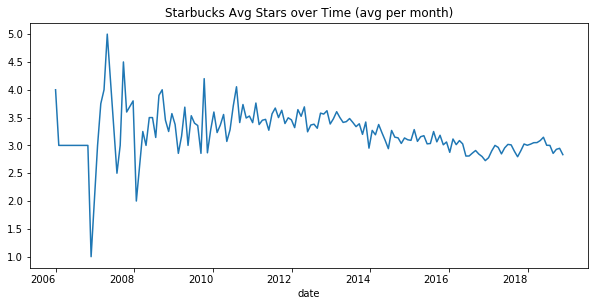

In [40]:
for df, name in zip(boi_review_df_list, boi_list):
    df_star = df[['stars', 'date']]
    df_star.head()
    df_star_vs_date = df_star.groupby('date').stars.mean()
    df_star_vs_date.head()

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    star_monthly_change = df_star_vs_date.groupby(pd.Grouper(freq='30D', base=0, label='right')).mean()
    star_monthly_change = star_monthly_change.dropna()
    star_monthly_change.plot.line(label='Stars', ax=ax, rot=0, figsize=(10, 5), title="{} Avg Stars over Time (avg per month)".format(name))

In [41]:
# union the dataframes in the list into one dataframe by using pd.concat
boi_review_df = pd.concat(boi_review_df_list, axis=0)
boi_review_df.head()

,business_id,stars,useful,funny,cool,text,date,business_name
286,4QAgHOm7BE5yZupy0j-NJQ,1,0,0,0,Worst service ever. Only one here and took 10...,2017-07-18 17:31:43,Starbucks
572,vYu1_HnKIcj6_rhw3p4qYw,1,1,1,0,Worst Starbucks EVER!!!! The wait time is alwa...,2015-10-17 00:43:00,Starbucks
584,JxKWfZ6hG8iRnK8QL65jTw,1,0,0,0,Very rude staff. Slow little to no communicati...,2017-07-28 17:44:36,Starbucks
603,t6SfYTEvg0o_cfJddsqEcg,5,0,0,0,I was very pleased with my visit yesterday the...,2017-12-29 15:41:18,Starbucks
631,5jak2hYO5ikUzjm-Ytao5A,2,1,0,0,Always slow service. They don't always have wh...,2015-04-28 19:28:49,Starbucks


In [42]:
# join dataframe of review and location by using pd.merge
boi_final_df = pd.merge(boi_review_df, boi_location, on='business_id')

In [53]:
boi_final_df.to_csv('processed_data_starbucks.csv')

## Sentiment analysis using GCP Natural Language API

<a href="https://cloud.google.com/natural-language/docs/getting-started?authuser=1#set_up_a_project">reference</a>  
- Create a new project in GCP console 
- Go to Manage APIs/APIs overview on your dashboard
- Search for Language API - Select Cloud Natural LAnguage API
- Enable it
- <a href="https://cloud.google.com/docs/authentication/production#finding_credentials_automatically">Create a service account.</a>   
    - In the Cloud Console, go to the Create service account key page.
    - From the Service account list, select New service account.
    - In the Service account name field, enter a name.
    - From the Role list, select Project > Owner.
    - Click Create. A JSON file that contains your key downloads to your computer.
- Download a private key as JSON.
- The path of this json file has to be added later in the notebook (you will find it in the 3rd code block)

### Installed the Google Client Library

In [2]:
#Loading necessary libraries
#!pip install --upgrade google-cloud-language
import argparse
from google.cloud import language
from google.cloud.language import enums, types

In [3]:
#Create an environment variable for your credentials
#change the path to your own path where you put the downloaded json file from that link.
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="SA yelp-db9f4a2db896.json"

In [5]:
#Load the dataset
import pandas as pd
dataset =pd.read_csv("processed_data_starbucks_2.csv")  
dataset.head()

,Unnamed: 0,business_id,business_name,state,city,date,stars,useful,funny,cool,text
0,0,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2017-07-18 17:31:43,1,0,0,0,Worst service ever. Only one here and took 10...
1,1,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2015-10-24 15:45:36,1,0,1,0,This location is consistently out of breakfast...
2,2,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2017-03-04 06:39:24,5,0,0,0,I just love the location! I love the barista's...
3,3,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2015-07-04 16:32:34,4,0,0,0,Great spot for outdoor seating in the summer s...
4,4,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2017-03-15 18:09:00,4,5,3,5,How did I end up across town at this starbucks...


In [10]:
len(dataset)
sample = dataset.loc[1:100,]

### Calculate sentiment score

The model will calculate a sentiment score for each sentence in one entire review, along with an overall score and a magnitude value for the entire review.

In [6]:
def analyze_text_sentiment(text):
    client = language.LanguageServiceClient()
    doc = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    response = client.analyze_sentiment(document=doc)

    sentiment = response.document_sentiment
    results = [
        (sentiment.score),
        (sentiment.magnitude),
    ]
    #for k, v in results:
        #print('{:10}: {}'.format(k, v))
    return results

In [12]:
#Apply this to each row of the sample dataset
sample['sentiment'] = sample['text'].apply(analyze_text_sentiment)

/Users/rayna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
#splitting the column into two
sample[['score','magnitude']] = pd.DataFrame(sample.sentiment.tolist(), index= sample.index)
sample.head()

,Unnamed: 0,business_id,business_name,state,city,date,stars,useful,funny,cool,text,sentiment,score,magnitude
1,1,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2015-10-24 15:45:36,1,0,1,0,This location is consistently out of breakfast...,"[-0.30000001192092896, 2.9000000953674316]",-0.3,2.9
2,2,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2017-03-04 06:39:24,5,0,0,0,I just love the location! I love the barista's...,"[0.800000011920929, 2.5999999046325684]",0.8,2.6
3,3,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2015-07-04 16:32:34,4,0,0,0,Great spot for outdoor seating in the summer s...,"[0.30000001192092896, 1.100000023841858]",0.3,1.1
4,4,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2017-03-15 18:09:00,4,5,3,5,How did I end up across town at this starbucks...,"[0.20000000298023224, 7.599999904632568]",0.2,7.6
5,5,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,2016-02-12 02:51:32,1,0,0,0,Not happy with evening service here. Karissa ...,"[-0.6000000238418579, 5.900000095367432]",-0.6,5.9


In [17]:
#Apply this to each row of the dataset
dataset['sentiment']=dataset['text'].apply(analyze_text_sentiment)
#splitting the column into two
dataset[['score','magnitude']] = pd.DataFrame(dataset.sentiment.tolist(), index= dataset.index)
dataset.to_csv("dataset_with_sentiment.csv")

With sentiment score representing positive/negative and sentiment magnitude representing how strong the sentiments are (proportional to length), I came up with an aggregated score by multiplying the two, following the simple idea that, if a sentiment is negative and more words (emotions) are used, it means stronger the sentiment!

Then I mapped the aggregated score to ratings from 1-5 using the rules below:

|Range | Description | Score |
| --- | --- | --- |
|<=-0.3 | Very Poor | 1 |
|0.1-0.299 | Poor | 2 |
|0-0.1 | Mixed/Neutral | 3 |
|0.2-2.99 | Satisfied | 4 |
|3.0+| Very Happy | 5 |

## EDA on the sentiment scores results

In [54]:
reviews = pd.read_csv('dataset_with_sentiment.csv')
reviews.head()

,Unnamed: 0,Unnamed: 0.1,business_id,business_name,state,city,date,stars,useful,funny,...,text,sentiment (API output),score,magnitude,Aggregated sentiment score,Sentiment Rating,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,0,0,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,7/18/2017 17:31,1,0,0,...,Worst service ever. Only one here and took 10...,"[-0.5, 2.0999999046325684]",-0.5,2.1,-1.0,1.0,NaN,Range,Description,Score
1,1,1,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,10/24/2015 15:45,1,0,1,...,This location is consistently out of breakfast...,"[-0.30000001192092896, 2.9000000953674316]",-0.3,2.9,-0.9,1.0,NaN,<=-0.3,Very Poor,1
2,2,2,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,3/4/2017 6:39,5,0,0,...,I just love the location! I love the barista's...,"[0.800000011920929, 2.5999999046325684]",0.8,2.6,2.1,4.0,NaN,0.1-0.299,Poor,2
3,3,3,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,7/4/2015 16:32,4,0,0,...,Great spot for outdoor seating in the summer s...,"[0.30000001192092896, 1.100000023841858]",0.3,1.1,0.3,4.0,NaN,0-0.1,Mixed/Neutral,3
4,4,4,4QAgHOm7BE5yZupy0j-NJQ,Starbucks,NV,Las Vegas,3/15/2017 18:09,4,5,3,...,How did I end up across town at this starbucks...,"[0.20000000298023224, 7.599999904632568]",0.2,7.6,1.5,4.0,NaN,0.2-2.99,Satisfied,4


In [55]:
equal = reviews[reviews['stars'] == reviews['Sentiment Rating']]
different = reviews[reviews['stars'] != reviews['Sentiment Rating']]

In [ ]:
for index, row in equal.iterrows():
    print('----------------------------------REVIEW----------------------------------')
    print('RATING:', row['stars'])
    print(row['text'])

### Charts
#### Ratings vs. Sentiment Scores

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

In [56]:
different['rating_diff'] = abs(different['Sentiment Rating'] - different['stars'])

/Users/rayna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


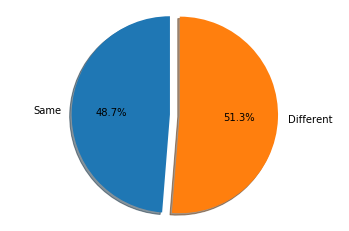

In [57]:
# draw pie chart of matching and mismatching
labels = 'Same', 'Different'
sizes = [4964, 5222]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**From the pie chart above, we

In [58]:
different['rating_diff'].value_counts()

1.0    4236
2.0     830
3.0     135
4.0      21
Name: rating_diff, dtype: int64

/Users/rayna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


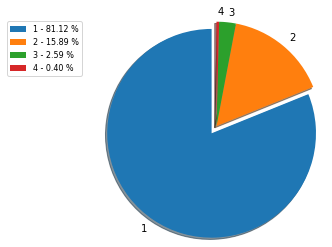

In [59]:
# draw pie chart of the difference between ratings and sentiment scores
x = np.char.array(['1', '2', '3', '4'])
y = np.array([4236, 830, 135, 21])
explode = (0.1,0,0,0)
#colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2, labels=x,shadow=True, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

Text(0.5, 6.79999999999999, 'Ratings')

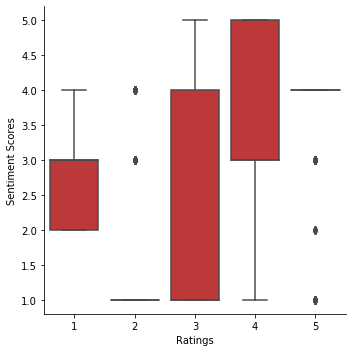

In [62]:
# draw box-plot of the distribution of sentiment scores on different ratings
sns.catplot(x = "stars",  y = 'Sentiment Rating', kind = "box", data = different, color='#d32323')
plt.ylabel('Sentiment Scores')
plt.xlabel('Ratings')

### Regional analysis

In [63]:
reviews['rating_diff'] = abs(reviews['Sentiment Rating'] - reviews['stars'])
region_diff = reviews[['state', 'city', 'Sentiment Rating', 'stars', 'rating_diff']]

city_mean = region_diff.groupby(['state', 'city']).mean().sort_values(by='rating_diff', ascending=False).reset_index()
state_mean = region_diff.groupby(['state']).mean().sort_values(by='rating_diff', ascending=False).reset_index()

In [64]:
state_mean

,state,Sentiment Rating,stars,rating_diff
0,WI,2.935714,3.442857,0.750000
1,IL,2.420000,2.890000,0.670000
2,PA,2.954268,3.259146,0.640244
3,AB,3.102459,3.348361,0.639344
4,ON,3.193745,3.473501,0.637706
5,NC,2.724242,3.084848,0.636364
6,OH,2.926566,3.384449,0.634989
7,NV,2.571300,2.996397,0.628640
8,AZ,2.634412,3.081985,0.615449
9,SC,2.480769,2.865385,0.538462


Text(0.5, 1.0, 'Rating_diff of States')

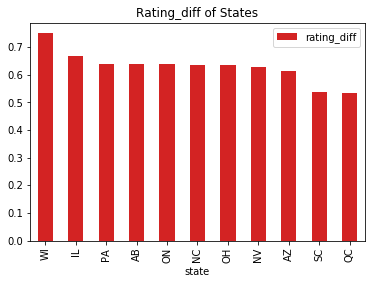

In [65]:
state_mean.plot(x='state',y='rating_diff',kind='bar', color='#d32323')
plt.title('Rating_diff of States')

Text(0.5, 1.0, 'Rating_diff of Cities in WI')

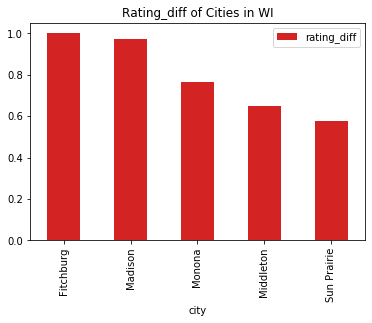

In [66]:
WI = city_mean[city_mean['state'] == 'WI']

WI.plot(x='city',y='rating_diff',kind='bar', color='#d32323')
plt.title('Rating_diff of Cities in WI')

In [67]:
test = reviews[['state', 'city', 'Sentiment Rating']]
arizona = test[test['state'] == 'AZ']
region_mean = arizona.groupby(['state', 'city']).mean().sort_values(by='Sentiment Rating', ascending=False)

In [68]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(region_mean)

                      Sentiment Rating
state city                            
AZ    Cave Creek              4.000000
      CAREFREE                4.000000
      Sun City                3.233333
      Fountain Hills          3.219512
      Surprise                3.059259
      Laveen                  2.935484
      Queen Creek             2.928571
      Mesa                    2.927273
      Tempe                   2.852713
      Chandler                2.756757
      Avondale                2.750000
      Gilbert                 2.704142
      Sun City West           2.666667
      Scottsdale              2.659498
      Phoenix                 2.516404
      Glendale                2.473684
      Peoria                  2.336283
      Goodyear                2.095238
      Tolleson                1.978723


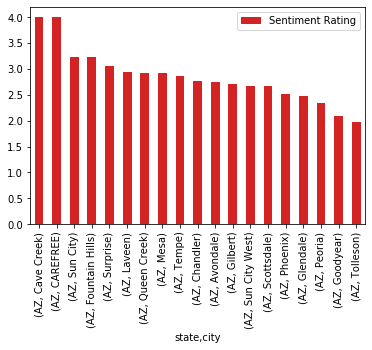

In [69]:
region_mean.plot(kind='bar', color='#d32323')

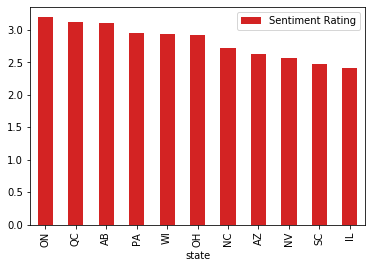

In [70]:
all_regions = test.groupby(['state']).mean().sort_values(by='Sentiment Rating', ascending=False)
all_regions.plot(kind='bar', color='#d32323')

#### Samples of diff=2 and diff=4

In [71]:
# Find an example review of diff=2
test = different[different['rating_diff'] == 2]
for index, row in test.iterrows():
    if row['Sentiment Rating'] == 1 and len(row['text']) <= 400:
        print('----------------------------------REVIEW----------------------------------')
        print('THEIRS:', row['stars'], 'OURS:',row['Sentiment Rating'])
        print(row['text'])

----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
Drive Thru lines are terrible.  Need to review hourly labor reports and schedule accordingly.  Also mix the sugar once the coffee is poured in the cup.  Bray and Elle are Awesome and get five stars
----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
This Starbucks is often understaffed and it's terrible for employees since they can't get tips.
----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
It's a newer Starbucks BUT...There's a lot of reasons this Starbucks only averages 3 Stars. The Cashiers need a lot more training in Customer Service and on how to run the registers. If the line is long....just AVOID.

Starbucks Cards are not accepted here.
----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
The service here is hit or miss, but the drinks are always pretty go

THEIRS: 3 OURS: 1.0
People are nice but it's always really slow.  It was obvious they were training a new girl today and there was a line out the door.  Where is the manager or her seasoned coworkers to jump in and help out?
----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
Once again, another Starbucks that assumes you want a creme based frap when you ask for a frap with coffee base. If we don't mention creme frap, stop punching in the order as a creme frap.

At least the barista was attentive when I told them about the issue and resolved it.
----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
Good customer service by the staff, but the washrooms are disgusting. Super unsanitary and very outdated.
----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
This is probably the most crowded Starbucks in all of Mississauga. If you're looking for a quiet place to stu

----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
Drink was good but service was ok. Maybe I am being a little particular. They took my name and wrote it in the cup....as I sat waiting for my name to be called...realized my drink was there for a while. Um why take my name if you aren't going to use it. I'm not one to hover around because it's usually a busy location. Glad I happened  to glance over and see my drink sitting there
----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
Looks great, nice staff, but open for a month and still no internet. They will lose business until it is fixed
----------------------------------REVIEW----------------------------------
THEIRS: 3 OURS: 1.0
Stiff competion from the other 2 starbucks near by.  

Employees are nice, but I often forget about this location since it is hidden from the street view and this intersection in surprise is such hell, I rush past everyth

In [72]:
different[different['text'].str.contains('Trying to stay cool on a hot PHX summer day calls for a trenta black tea with a splash of passion!!!')]

,Unnamed: 0,Unnamed: 0.1,business_id,business_name,state,city,date,stars,useful,funny,...,sentiment (API output),score,magnitude,Aggregated sentiment score,Sentiment Rating,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,rating_diff
3598,3598,3598,V7J2KXLaTX6d3oKnWxRYqw,Starbucks,AZ,Phoenix,7/15/2014 23:00,3,2,1,...,"[0.6000000238418579, 2.0]",0.6,2.0,1.2,5.0,NaN,NaN,NaN,NaN,2.0


In [73]:
# Find out what are the reviews with a diff=4
diff_4 = pd.DataFrame(different.loc[different["rating_diff"] == 4,["text","Sentiment Rating", "stars"]])

for index, row in diff_4.iterrows():
    print('----------------------------------REVIEW----------------------------------')
    print(row['stars'])
    print(row['Sentiment Rating'])
    print(row['text'])

----------------------------------REVIEW----------------------------------
5
1.0
The people were friendly but maybe they need to be given an espresso drink before starting their shift, Sunday's are always busy so they should be prepared for a fast phased environment. 4 staff only 1 making drinks, 1 taking front counter, orders and 1 in drive thru. Management should suggest possibly having crew members that are just standing at registers to make the items their waiting on so customers aren't waiting 20 min for 1 coffee in an empty lobby while drive thru is getting the only service.
----------------------------------REVIEW----------------------------------
5
1.0
This Starbucks is actually one of the hardest working Starbucks I've been to. Nikki (the manager) is always thinking of the customer idk what these other prissy little women are talking about. The baristas there are really great and if you ever get ignored it's most likely because you're a creepy pervy guy hitting on them because